**1. Library and data loading**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score, RandomizedSearchCV  # ✅ Fixed here

# Neural Network
from sklearn.neural_network import MLPClassifier

# Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Naive bayes
from sklearn.naive_bayes import GaussianNB

# Stacking
from mlxtend.classifier import StackingClassifier



# Reading in CSV's from a file path
train_df = pd.read_csv('survey.csv')

# Pandas: what's the data row count?
print(train_df.shape)

# Pandas: what's the distribution of the data?
print(train_df.describe())

# Pandas: What types of data do I have?
print(train_df.info())


(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

**2. Data cleaning**

In [3]:
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Cleaning NaN**

In [4]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [5]:
#clean 'Gender'
#Slower case all columm's elements
gender = train_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [6]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

/tmp/ipython-input-6-3830636838.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
/tmp/ipython-input-6-3830636838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
/tmp/ipython-input-6-3830636838.py:7: SettingWi

In [7]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


/tmp/ipython-input-7-2102217308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')


In [8]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


/tmp/ipython-input-8-2467000427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )


**3. Encoding data**

In [9]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(60), np.int64(61), np.int64(62), np.int64(65), np.int64(72)]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Mo

/tmp/ipython-input-9-20715196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature] = le.transform(train_df[feature])
/tmp/ipython-input-9-20715196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature] = le.transform(train_df[feature])
/tmp/ipython-input-9-20715196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


**Testing there aren't any missing data**

In [10]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0      0.0
obs_consequence                0  

**4. Covariance Matrix. Variability comparison between categories of variables**

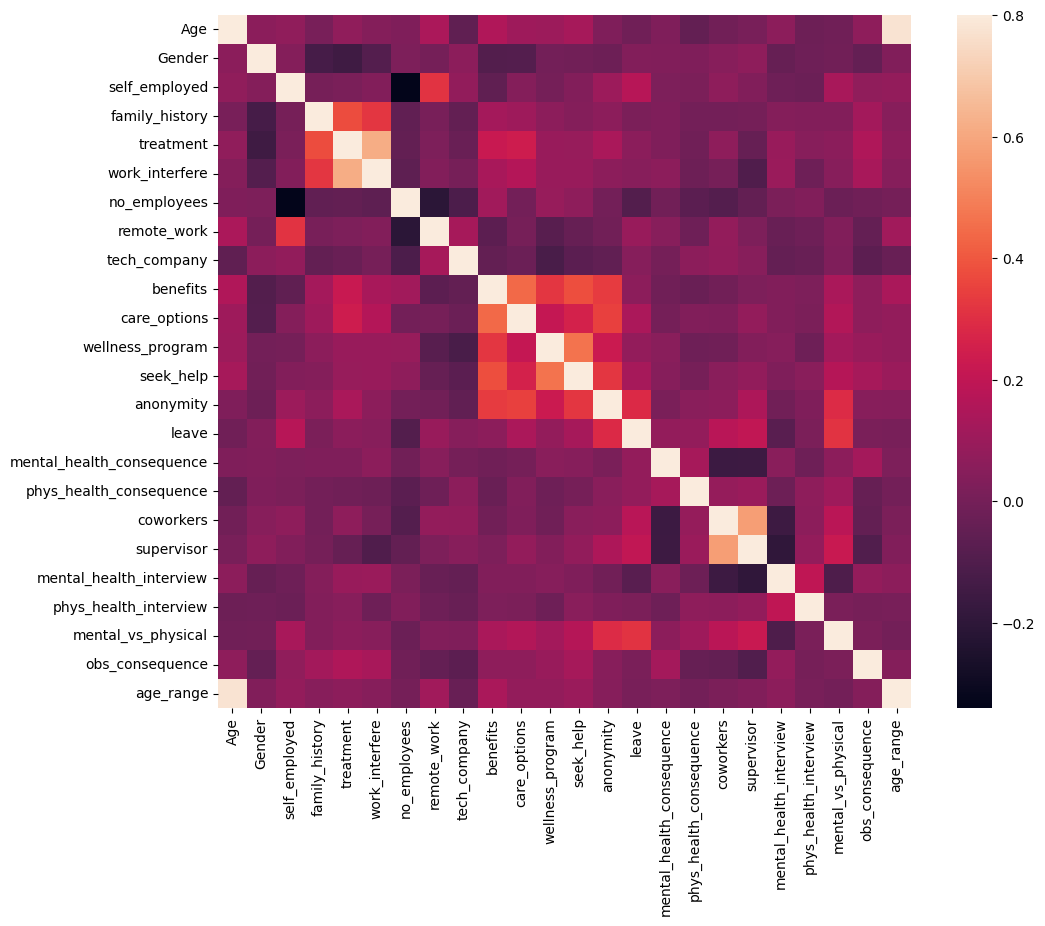

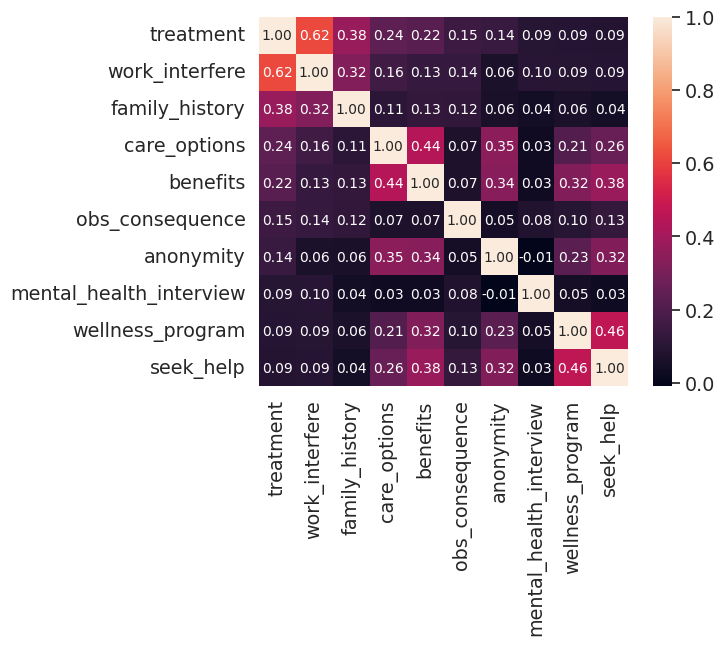

In [11]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**5. Some charts to see data relationship**

Distribiution and density by Age

/tmp/ipython-input-12-2516591640.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)


Text(0.5, 0, 'Age')

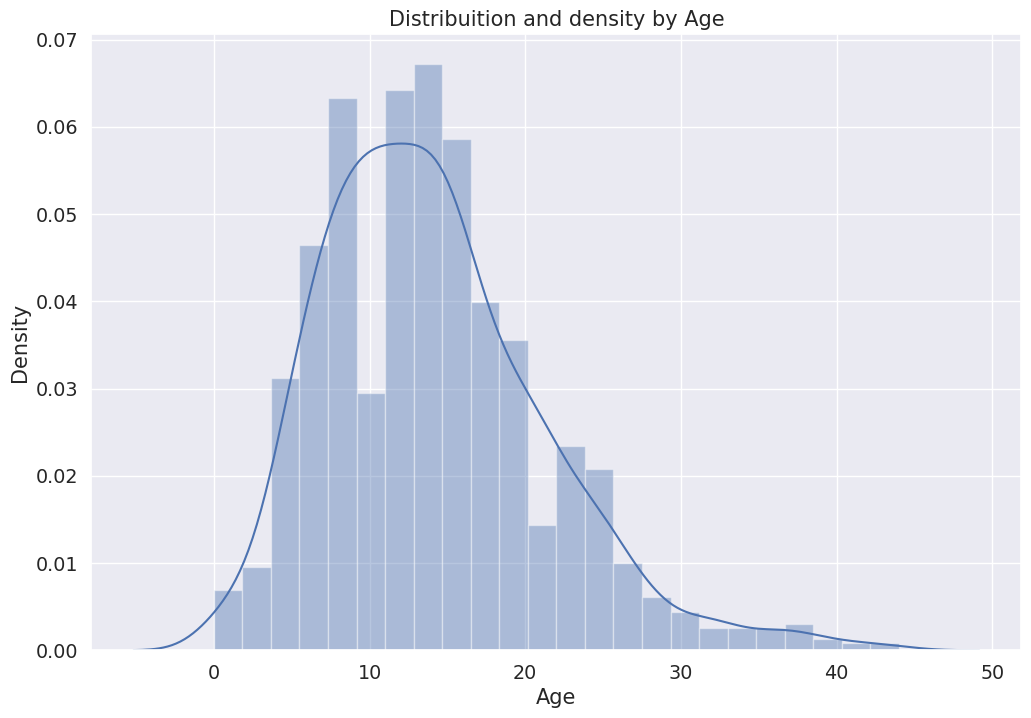

In [12]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

Separate by treatment

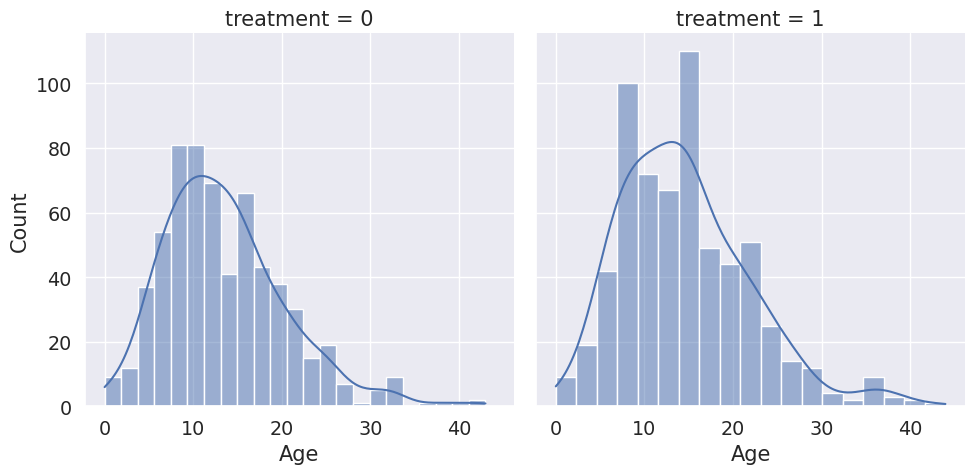

In [13]:
# Separate by treatment or not

g = sns.FacetGrid(train_df, col='treatment', height=5)
g.map(sns.histplot, "Age", kde=True)
plt.show()


How many people has been treated?

/tmp/ipython-input-14-4241817925.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels)


Text(0.5, 1.0, 'Total Distribuition by treated or not')

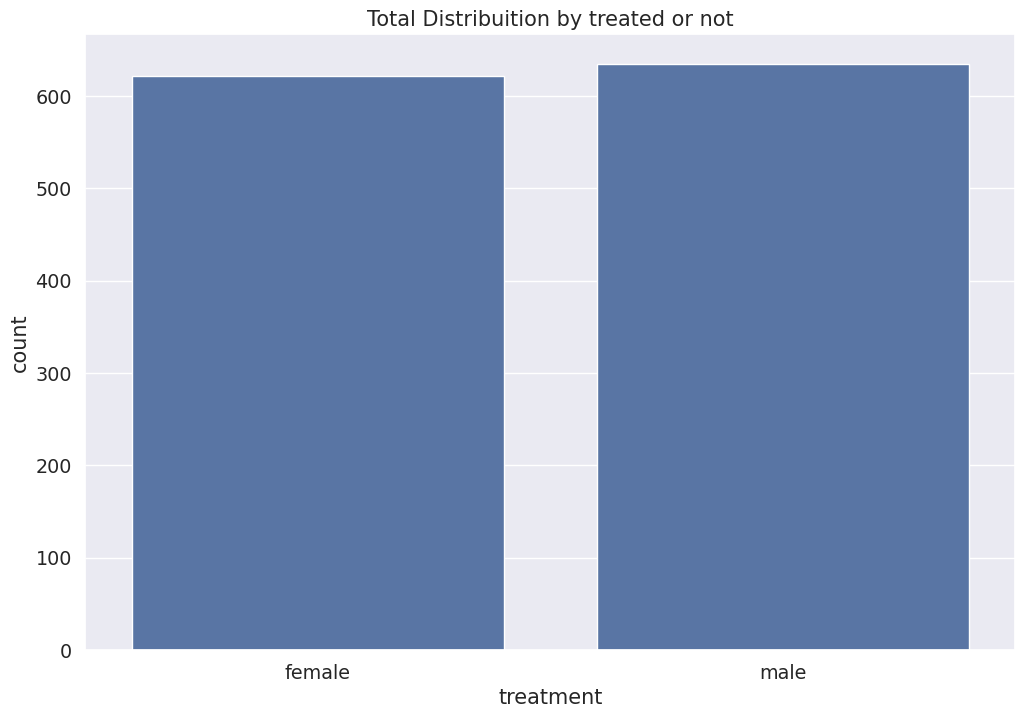

In [14]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train_df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

Draw a nested barplot to show probabilities for class and sex

/tmp/ipython-input-15-587889150.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


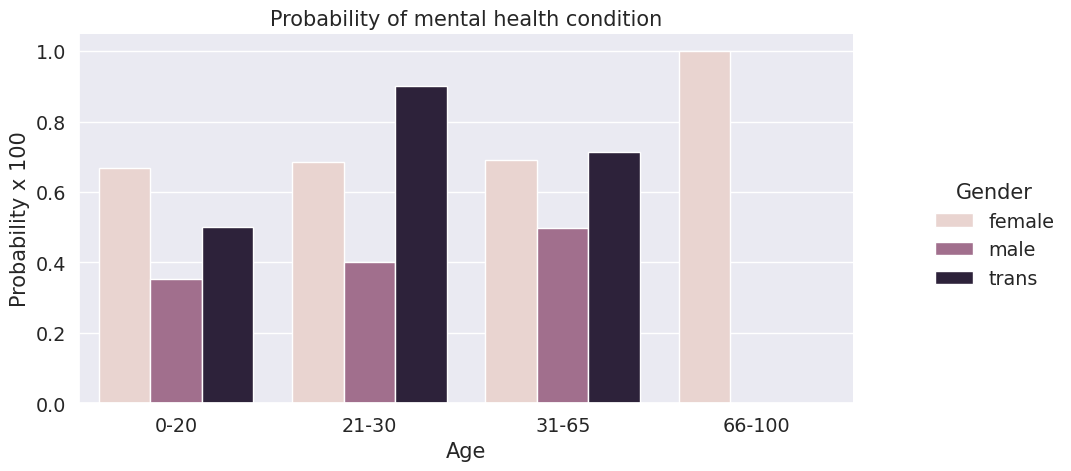

In [15]:
o = labelDict['label_age_range']

# Use catplot instead of factorplot
g = sns.catplot(
    x="age_range", y="treatment", hue="Gender",
    data=train_df, kind="bar",
    ci=None, height=5, aspect=2, legend_out=True
)

# Set x-axis tick labels
g.set_xticklabels(o)

# Set titles and labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Position the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for family history

/tmp/ipython-input-16-1455115823.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


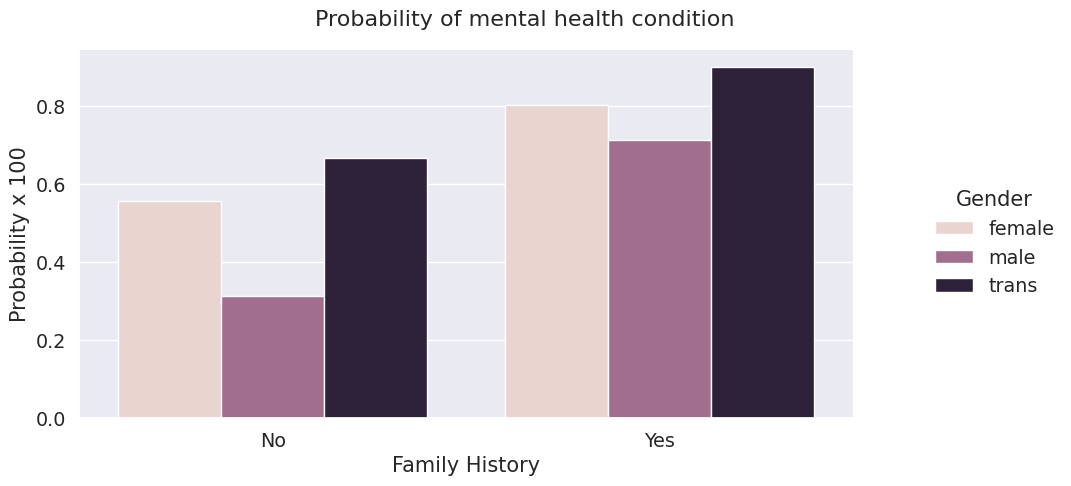

In [16]:
# Extract the x-axis tick labels
o = labelDict['label_family_history']

# Use sns.catplot (modern replacement of factorplot)
g = sns.catplot(
    x="family_history",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True
)

# Replace x-tick labels with descriptive ones
g.set_xticklabels(o)

# Add chart title and axis labels
g.set_axis_labels("Family History", "Probability x 100")
g.fig.suptitle('Probability of mental health condition', fontsize=16)

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Adjust layout so the title and legend don't overlap
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for care options

/tmp/ipython-input-17-2380604573.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


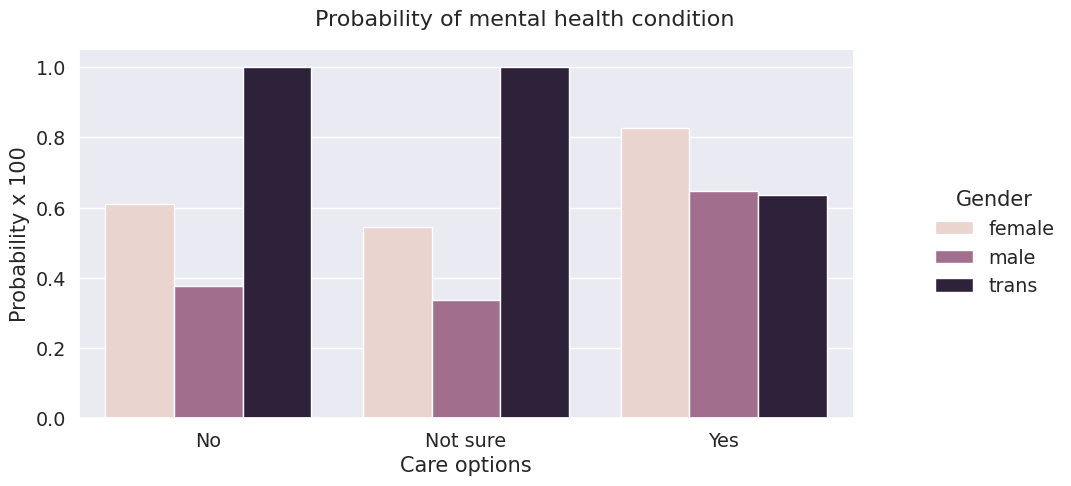

In [17]:
# Get custom x-axis labels
o = labelDict['label_care_options']

# Create the categorical plot
g = sns.catplot(
    x="care_options",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True
)

# Set x-axis tick labels
g.set_xticklabels(o)

# Set plot titles and axis labels
g.set_axis_labels("Care options", "Probability x 100")
g.fig.suptitle('Probability of mental health condition', fontsize=16)

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Adjust the layout so everything fits nicely
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for benefits

/tmp/ipython-input-18-1611782232.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


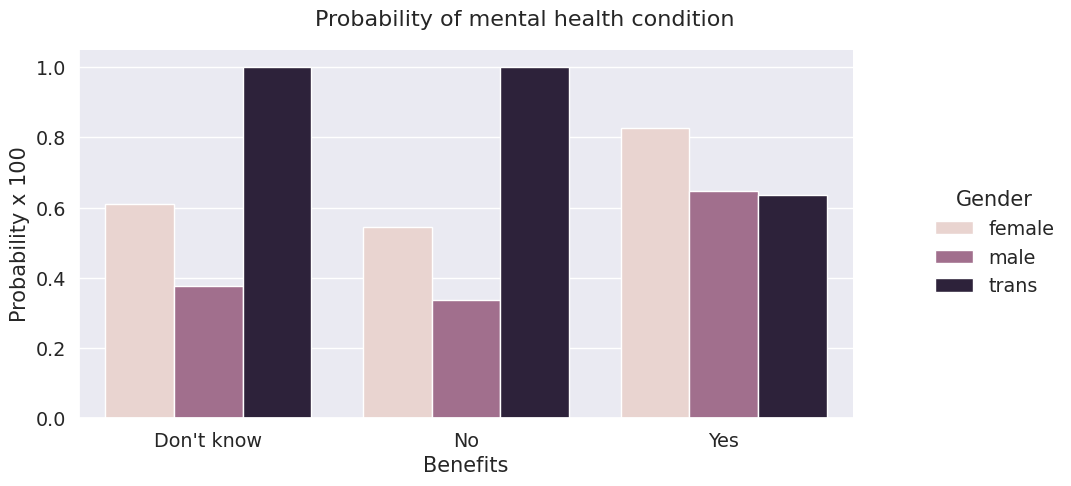

In [18]:
# Get custom x-axis labels
o = labelDict['label_benefits']

# Use sns.catplot instead of the deprecated factorplot
g = sns.catplot(
    x="care_options",  # Make sure this is supposed to be 'care_options' for the x-axis
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True
)

# Replace x-tick labels with readable versions
g.set_xticklabels(o)

# Add title and axis labels
g.set_axis_labels("Benefits", "Probability x 100")
g.fig.suptitle("Probability of mental health condition", fontsize=16)

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Adjust layout to fit legend and title
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for work interfere

/tmp/ipython-input-19-2708167691.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


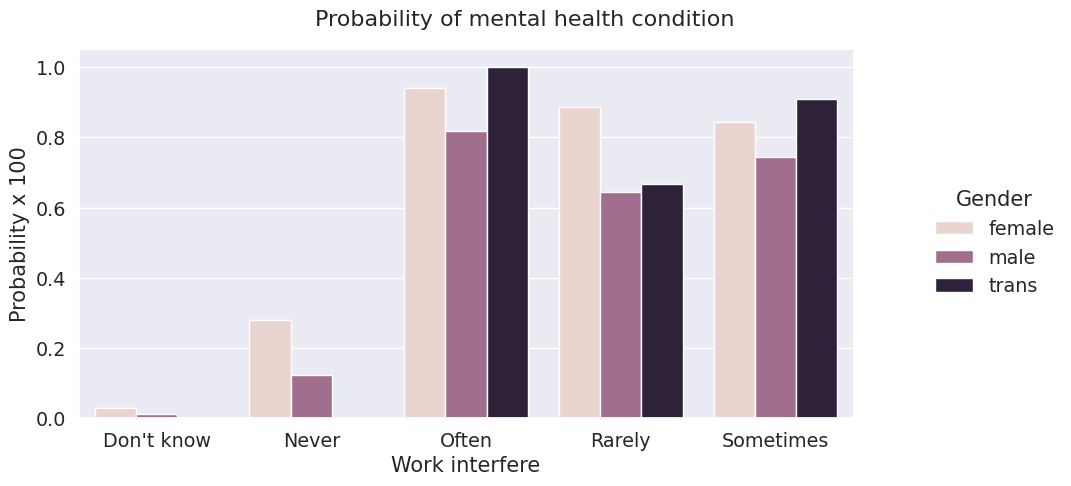

In [19]:
# Get custom x-axis tick labels from the label dictionary
o = labelDict['label_work_interfere']

# Use catplot (modern replacement for factorplot)
g = sns.catplot(
    x="work_interfere",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True
)

# Set custom x-axis tick labels
g.set_xticklabels(o)

# Set plot title and axis labels
g.set_axis_labels("Work interfere", "Probability x 100")
g.fig.suptitle("Probability of mental health condition", fontsize=16)

# Replace legend labels using your labelDict
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Adjust layout to ensure title and legend don't overlap
g.fig.subplots_adjust(top=0.9, right=0.8)

# Display the plot
plt.show()


**6. Scaling and fitting**

Features Scaling We're going to scale age, because is extremely different from the othere ones.

In [20]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Spliltting the dataset

In [21]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

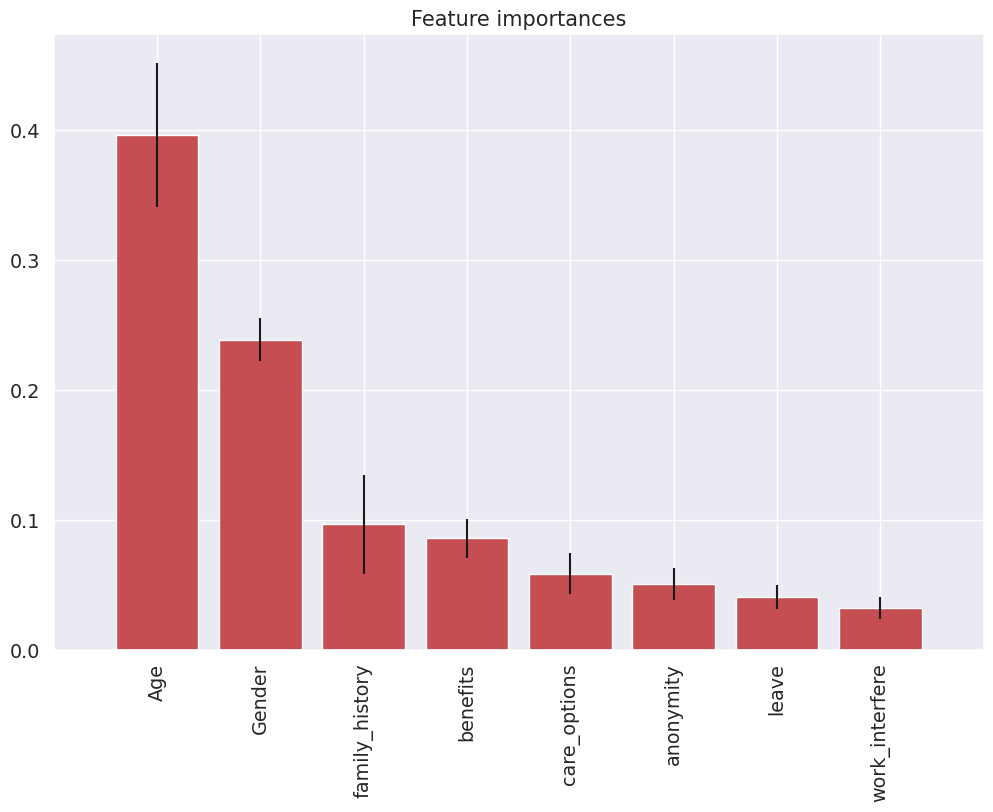

In [22]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

**7. Tuning**

**Evaluating a Classification Model.**

This function will evalue:

**Classification accuracy:** percentage of correct predictions
**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

**Percentage of ones**

**Percentage of zeros**

**Confusion matrix:** Table that describes the performance of a classification model

True Positives (TP): we correctly predicted that they do have diabetes
  True Negatives (TN): we correctly predicted that they don't have diabetes

  False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")

  Falsely predict positive

  False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")
  
  Falsely predict negative

**False Positive Rate**

**Precision of Positive value**

**AUC:** is the percentage of the ROC plot that is underneath the curve

  .90-1 = excellent (A)

  .80-.90 = good (B)

  .70-.80 = fair (C)

  .60-.70 = poor (D)
  
  .50-.60 = fail (F)

In [23]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())

    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())

    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())

    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making

    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))


    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')


    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################

    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!


    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)



    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

**Tuning with cross validation score**

In [24]:
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):

    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

**Tuning with GridSearchCV**

In [25]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)

    # view the complete results (list of named tuples)
    grid.grid_scores_

    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)

    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)

    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

**Tuning with RandomizedSearchCV**

In [26]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

**Tuning with searching multiple parameters simultaneously**

In [27]:
def tuningMultParam(knn):

    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)

    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)

    # view the complete results
    print(grid.grid_scores_)

    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

**8. Evaluating models**

Logistic Regression

########### Logistic Regression ###############
Accuracy: 0.7936507936507936
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


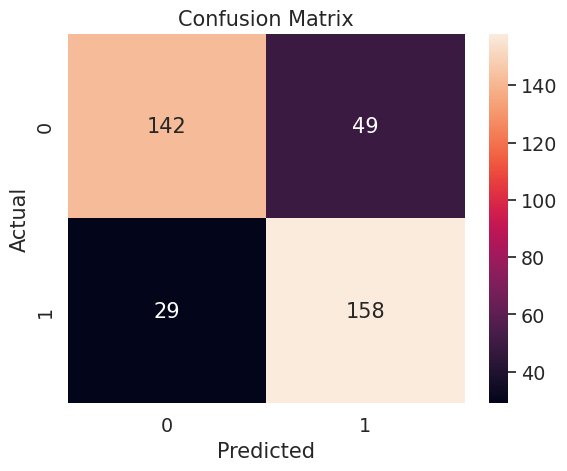

Classification Accuracy: 0.7936507936507936
Classification Error: 0.2063492063492064
False Positive Rate: 0.25654450261780104
Precision: 0.7632850241545893
AUC Score: 0.794187641739228
Cross-validated AUC: 0.8753371866593114
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09192784 0.90807216]
 [0.95998457 0.04001543]
 [0.96552072 0.03447928]
 [0.78739197 0.21260803]
 [0.38947126 0.61052874]
 [0.05256967 0.94743033]
 [0.75023269 0.24976731]
 [0.19037376 0.80962624]
 [0.61623206 0.38376794]
 [0.4769296  0.5230704 ]]
First 10 predicted probabilities for class 1:
 [0.90807216 0.04001543 0.03447928 0.21260803 0.61052874 0.94743033
 0.24976731 0.80962624 0.38376794 0.5230704 ]


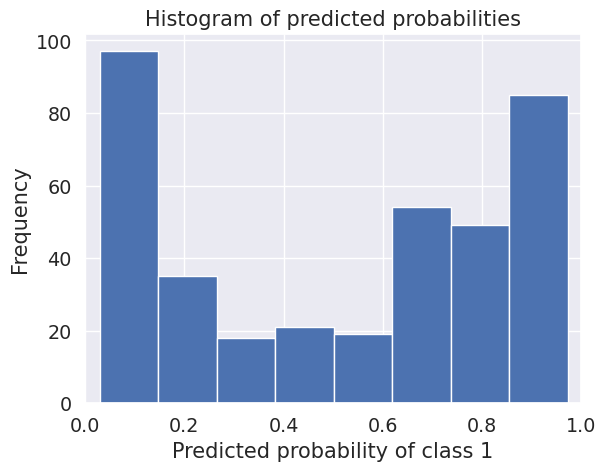

First 10 predicted probabilities (reshaped):
 [0.90807216 0.04001543 0.03447928 0.21260803 0.61052874 0.94743033
 0.24976731 0.80962624 0.38376794 0.5230704 ]


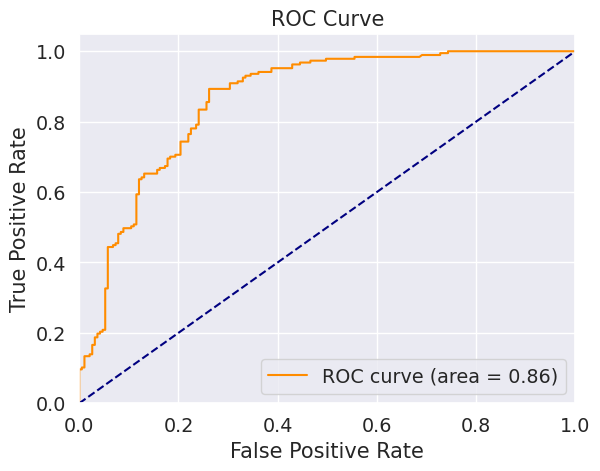

Confusion matrix with threshold 0.5:
 [[142  49]
 [ 29 158]]


In [28]:


# Assuming X_train, X_test, y_train, y_test, X, y, and methodDict are defined globally

def logisticRegression():
    # Train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

    print('########### Logistic Regression ###############')

    # Evaluate and return accuracy
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, plot=True)

    # Save result for later visualization
    methodDict['Log. Regres.'] = accuracy_score * 100

def evalClassModel(model, y_test, y_pred_class, plot=False):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())

    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    # Confusion Matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # Visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Basic metrics
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - accuracy)
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    # Probability Predictions
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    print('First 10 predicted responses:\n', model.predict(X_test)[:10])
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[:10])
    print('First 10 predicted probabilities for class 1:\n', y_pred_prob[:10])

    if plot:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of class 1')
        plt.ylabel('Frequency')
        plt.show()

    # Apply threshold = 0.3
    y_pred_class_threshold = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3).ravel()
    print('First 10 predicted probabilities (reshaped):\n', y_pred_prob[:10])

    # ROC Curve and AUC
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

    # Evaluate threshold = 0.5 manually
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion_mine = metrics.confusion_matrix(y_test, predict_mine)
    print('Confusion matrix with threshold 0.5:\n', confusion_mine)

    return accuracy

# Call the function
logisticRegression()


KNeighbors Classifier

########### KNeighborsClassifier ###############
Rand. Best Score:  0.8201841269841269
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 15}
Repeated Best Scores: [np.float64(0.819), np.float64(0.812), np.float64(0.818), np.float64(0.818), np.float64(0.819)]
Accuracy: 0.798941798941799
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


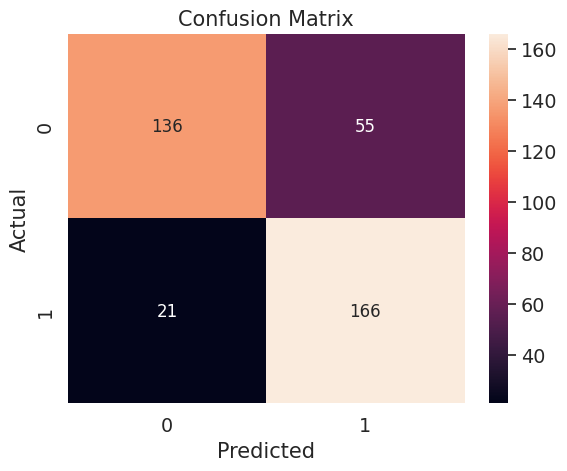

Classification Accuracy: 0.798941798941799
Classification Error: 0.20105820105820105
False Positive Rate: 0.2879581151832461
Precision: 0.751131221719457
AUC Score: 0.799871209788056
Cross-validated AUC: 0.8796585902132656
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.8        0.2       ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.4        0.6       ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities for class 1:
 [0.66666667 0.         0.         0.2        0.66666667 1.
 0.2        0.6        0.66666667 0.66666667]


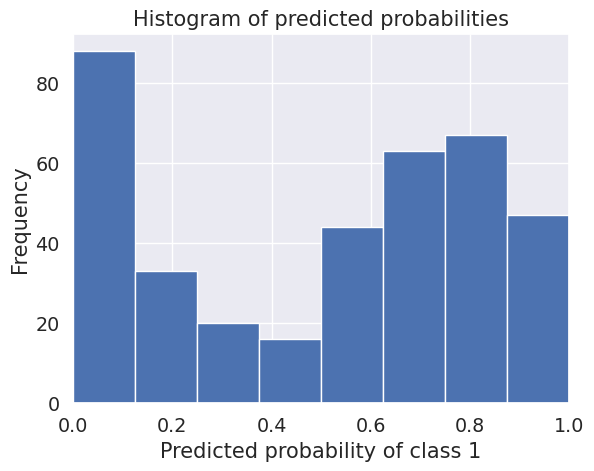

First 10 predicted probabilities (reshaped):
 [0.66666667 0.         0.         0.2        0.66666667 1.
 0.2        0.6        0.66666667 0.66666667]


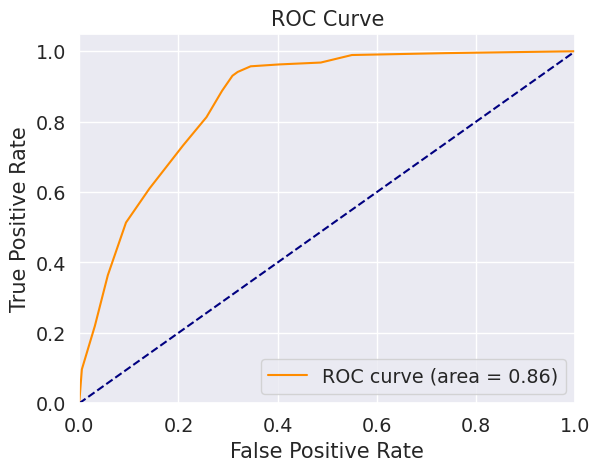

Confusion matrix with threshold 0.5:
 [[136  55]
 [ 21 166]]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Assumes X_train, X_test, y_train, y_test, X, y, methodDict are defined globally

def tuningRandomizedSearchCV(model, param_dist):
    # Run initial Randomized Search
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)

    # Print best results
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # Optional: Repeat search multiple times to see variation (expensive!)
    best_scores = []
    for _ in range(5):  # Reduce from 20 to 5 for speed
        rand_loop = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand_loop.fit(X, y)
        best_scores.append(round(rand_loop.best_score_, 3))

    print('Repeated Best Scores:', best_scores)

    return rand.best_params_

def Knn():
    print('########### KNeighborsClassifier ###############')

    # Initial model for tuning
    knn = KNeighborsClassifier()

    # Parameter grid
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    param_dist = dict(n_neighbors=k_range, weights=weight_options)

    # Run tuning
    best_params = tuningRandomizedSearchCV(knn, param_dist)

    # Use best params found (fallback to default if not found)
    best_k = best_params.get('n_neighbors', 5)
    best_weight = best_params.get('weights', 'uniform')

    # Train final model
    knn_final = KNeighborsClassifier(n_neighbors=best_k, weights=best_weight)
    knn_final.fit(X_train, y_train)

    # Predict on test set
    y_pred_class = knn_final.predict(X_test)

    # Evaluate and log result
    accuracy_score = evalClassModel(knn_final, y_test, y_pred_class, plot=True)
    methodDict['KNN'] = accuracy_score * 100

# Run KNN
Knn()


Decision Tree classifier

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 4}
Repeated Best Scores: [np.float64(0.83), np.float64(0.831), np.float64(0.831), np.float64(0.83), np.float64(0.83)]
########### Tree classifier ###############
Accuracy: 0.8068783068783069
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


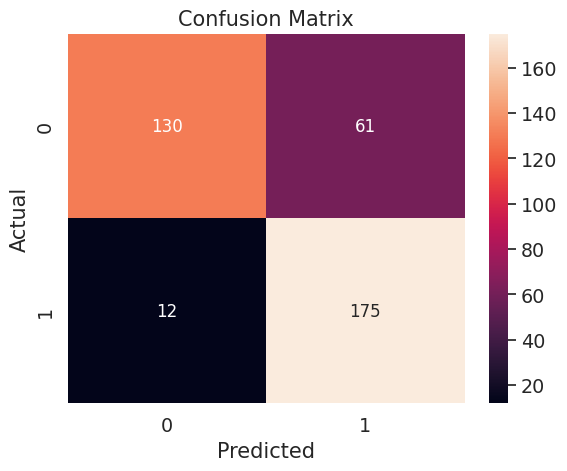

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.8799642034233047
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18823529 0.81176471]
 [0.97959184 0.02040816]
 [1.         0.        ]
 [0.8778626  0.1221374 ]
 [0.36097561 0.63902439]
 [0.05172414 0.94827586]
 [0.8778626  0.1221374 ]
 [0.11320755 0.88679245]
 [0.36097561 0.63902439]
 [0.36097561 0.63902439]]
First 10 predicted probabilities for class 1:
 [0.81176471 0.02040816 0.         0.1221374  0.63902439 0.94827586
 0.1221374  0.88679245 0.63902439 0.63902439]


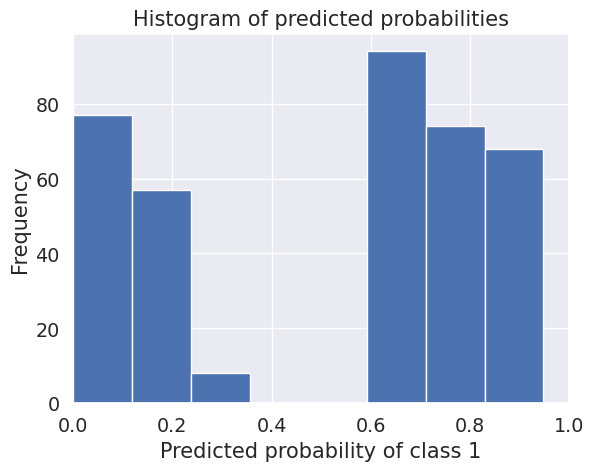

First 10 predicted probabilities (reshaped):
 [0.81176471 0.02040816 0.         0.1221374  0.63902439 0.94827586
 0.1221374  0.88679245 0.63902439 0.63902439]


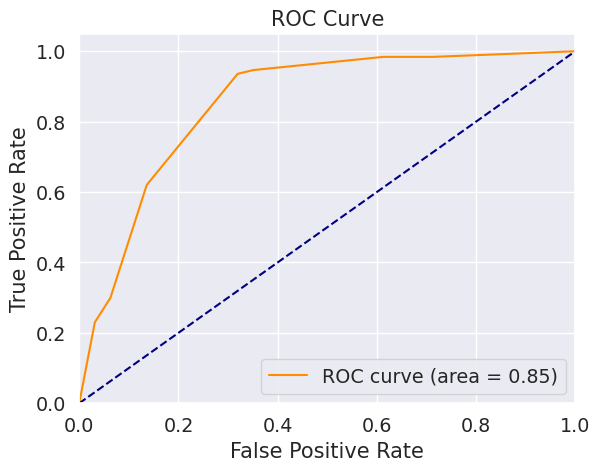

Confusion matrix with threshold 0.5:
 [[130  61]
 [ 12 175]]


In [30]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)

    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)

    print('########### Tree classifier ###############')

    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100
treeClassifier()

Random Forests

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
Repeated Best Scores: [np.float64(0.834), np.float64(0.831), np.float64(0.831), np.float64(0.832), np.float64(0.831)]
########### Random Forests ###############
Accuracy: 0.8121693121693122
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


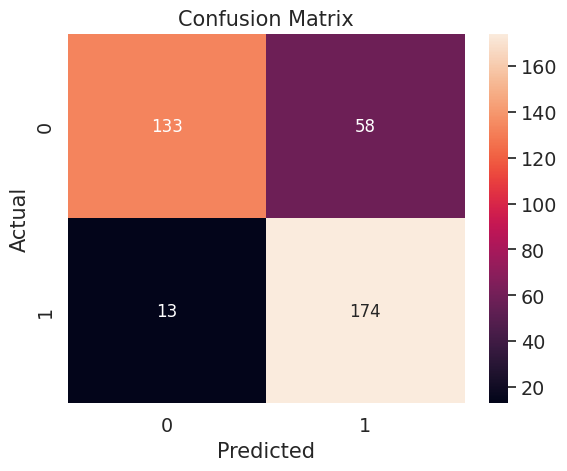

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8934280651104528
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2555794  0.7444206 ]
 [0.95069083 0.04930917]
 [0.93851009 0.06148991]
 [0.87096597 0.12903403]
 [0.40653554 0.59346446]
 [0.17282958 0.82717042]
 [0.89450448 0.10549552]
 [0.4065912  0.5934088 ]
 [0.20540631 0.79459369]
 [0.19337644 0.80662356]]
First 10 predicted probabilities for class 1:
 [0.7444206  0.04930917 0.06148991 0.12903403 0.59346446 0.82717042
 0.10549552 0.5934088  0.79459369 0.80662356]


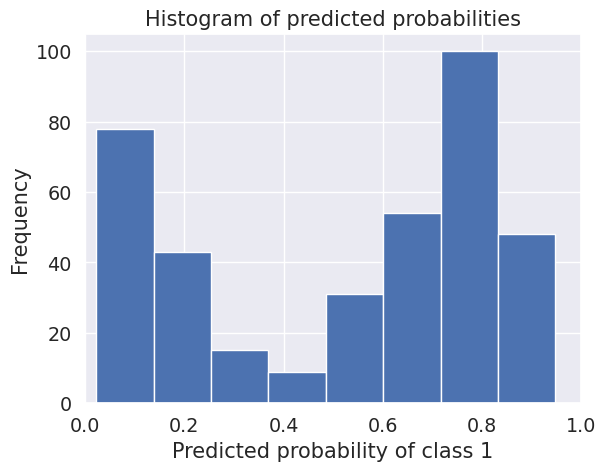

First 10 predicted probabilities (reshaped):
 [0.7444206  0.04930917 0.06148991 0.12903403 0.59346446 0.82717042
 0.10549552 0.5934088  0.79459369 0.80662356]


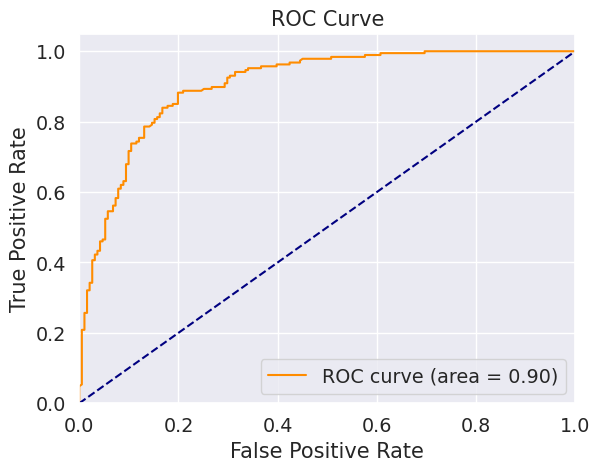

Confusion matrix with threshold 0.5:
 [[133  58]
 [ 13 174]]


In [31]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)

    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)

    print('########### Random Forests ###############')

    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100
randomForest()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Apply Grid Search for best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Train on the training set
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
acc = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print metrics
print("Accuracy:", acc)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy: 0.8068783068783069
Recall: 0.9358288770053476
Precision: 0.7415254237288136
F1 Score: 0.8274231678486997
ROC-AUC: 0.8983117283086486
Confusion Matrix:
 [[130  61]
 [ 12 175]]


XGBoost ROC Curve

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:46:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7897435897435897
Recall: 0.9133858267716536
Precision: 0.7945205479452054
F1 Score: 0.8498168498168498
ROC-AUC Score: 0.8192450208429829
Confusion Matrix:
 [[ 38  30]
 [ 11 116]]
First 10 prediction probabilities:
 [0.8818578  0.7451949  0.73403996 0.8951101  0.08334744 0.22058599
 0.52506554 0.18332416 0.12679866 0.4997015 ]


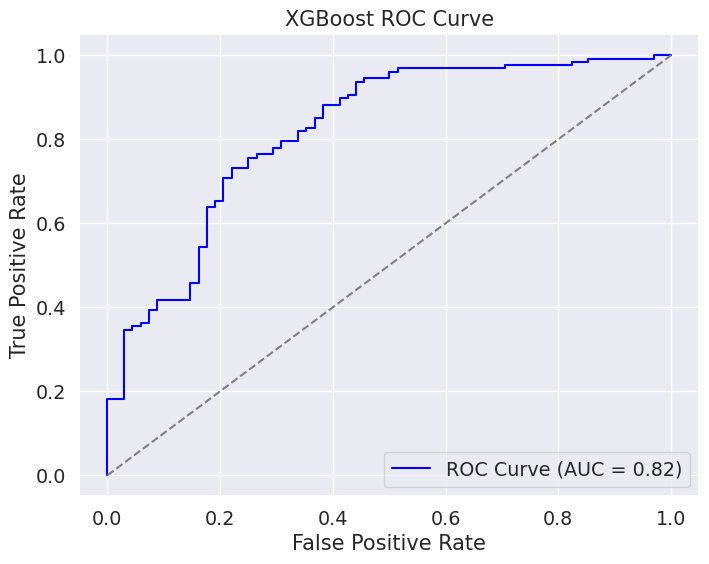

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv("survey.csv")

# Drop irrelevant columns
df = df.drop(columns=['Timestamp', 'state', 'comments'])

# Clean age
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]

# Normalize gender values
def clean_gender(g):
    g = str(g).lower()
    if 'male' in g:
        return 'Male'
    elif 'female' in g:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

# Drop rows with missing values
df = df.dropna()

# Separate features and target
X = df.drop(columns='treatment')
y = df['treatment']

# Encode categorical features
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Encode target
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# XGBoost Classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", acc)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# First 10 prediction probabilities
print("First 10 prediction probabilities:\n", y_prob[:10])

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Stacking

**9. Predicting with Neural Network**

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv("survey.csv")
df = df.drop(columns=['Timestamp', 'state', 'comments'])
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]

def clean_gender(g):
    g = str(g).lower()
    if 'male' in g: return 'Male'
    elif 'female' in g: return 'Female'
    else: return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)
df = df.dropna()

X = df.drop(columns='treatment')
y = df['treatment']

# Encode
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
y = LabelEncoder().fit_transform(y)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
X_res, y_res = SMOTE(random_state=42).fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Build Neural Net
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5661 - loss: 0.6744 - val_accuracy: 0.7581 - val_loss: 0.5663
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7375 - loss: 0.5539 - val_accuracy: 0.7823 - val_loss: 0.5068
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7461 - loss: 0.5037 - val_accuracy: 0.7903 - val_loss: 0.4891
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 0.4774 - val_accuracy: 0.7984 - val_loss: 0.4811
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7833 - loss: 0.4715 - val_accuracy: 0.8024 - val_loss: 0.4760
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7367 - loss: 0.4984 - val_accuracy: 0.8226 - val_loss: 0.4626
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7941 - loss: 0.4583 - val_accuracy: 0.8105 - val_loss: 0.4639
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7864 - loss: 0.4501 - val_accuracy: 0.8065 - val_loss: 0.4562
Ep

Stacking Ensemble

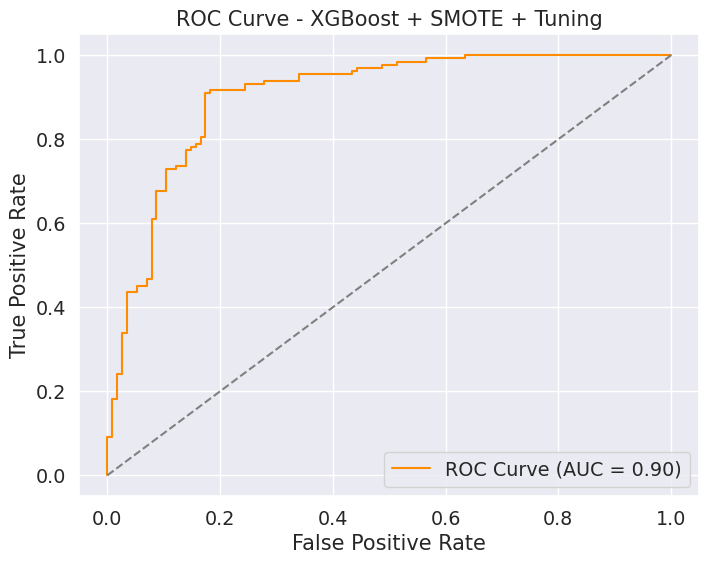

Accuracy: 0.8588709677419355
Recall: 0.9172932330827067
Precision: 0.8356164383561644
F1 Score: 0.8745519713261649
ROC-AUC Score: 0.9032363517489376
Confusion Matrix:
 [[ 91  24]
 [ 11 122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       115
           1       0.84      0.92      0.87       133

    accuracy                           0.86       248
   macro avg       0.86      0.85      0.86       248
weighted avg       0.86      0.86      0.86       248



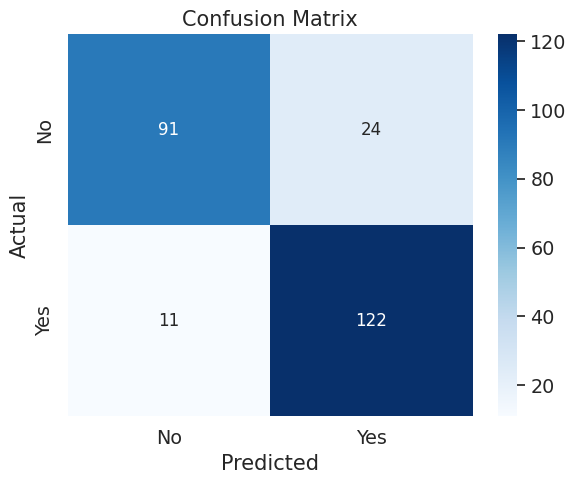

In [35]:
# Let's generate the ROC Curve and Confusion Matrix as separate figures
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Apply SMOTE
X_res, y_res = SMOTE(random_state=42).fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

# Predictions and metrics
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC Curve - separate figure
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost + SMOTE + Tuning')
plt.legend()
plt.grid(True)
plt.show()
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix - separate figure
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


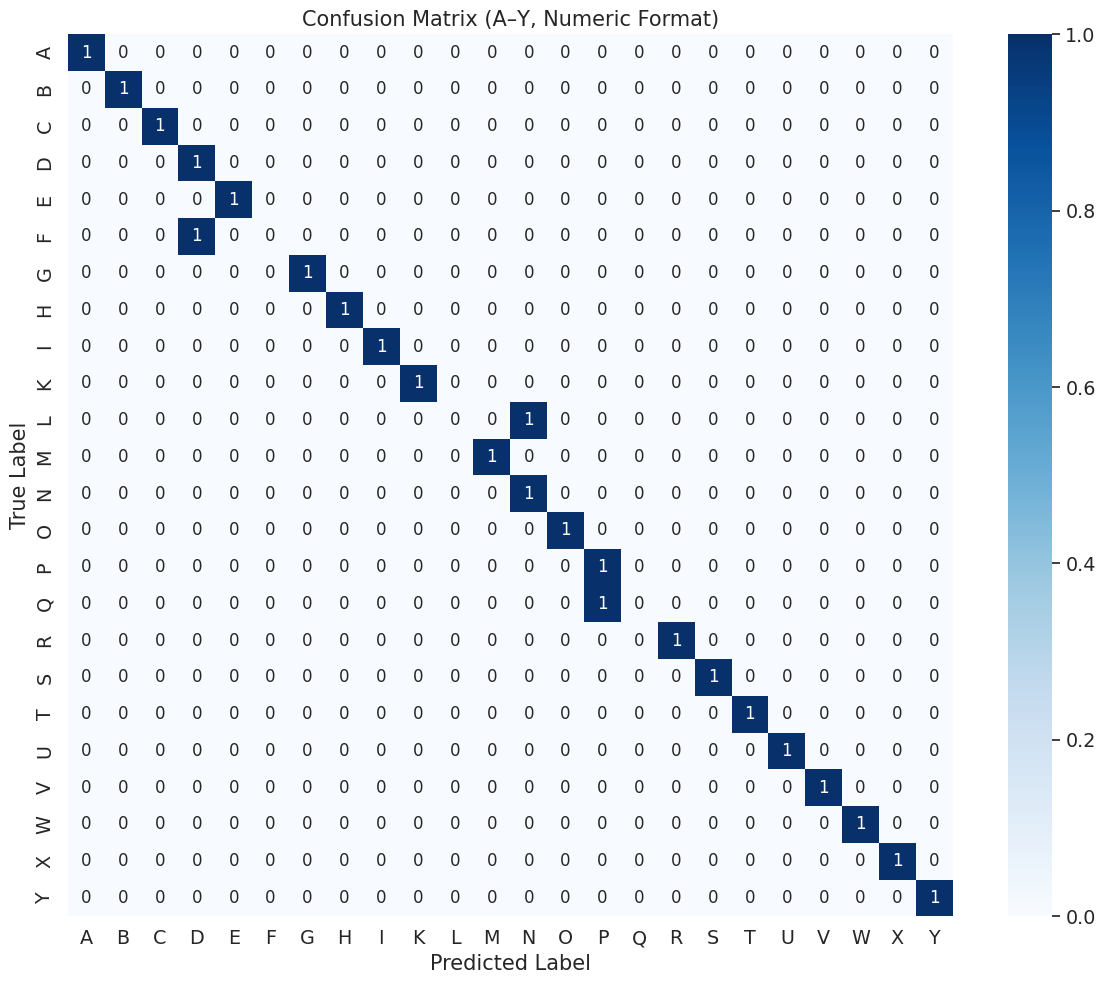

In [36]:
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -------------------------------
# 1. Generate Label Map (A–Y excluding J and Z)
# -------------------------------
letters = list(string.ascii_uppercase)
letters.remove('J')  # index 9 removed
letters.remove('Z')  # index 25 removed
class_labels = letters  # ['A', 'B', ..., 'Y'] (24 total)

# Create index-to-letter and letter-to-index mappings
letter_to_index = {letter: idx for idx, letter in enumerate(class_labels)}
index_to_letter = {idx: letter for letter, idx in letter_to_index.items()}

# -------------------------------
# 2. Simulated y_true and y_pred (Numeric)
# -------------------------------
# Example: assuming perfect classification except a few mismatches
# Let's say we have one sample for each class in y_true, and introduce a few errors in y_pred

y_true = list(range(24))  # [0, 1, 2, ..., 23]
y_pred = list(range(24))  # same as y_true initially

# Introduce some prediction errors
y_pred[5] = 3   # Misclassify class 5 as 3
y_pred[10] = 12 # Misclassify class 10 as 12
y_pred[15] = 14 # Misclassify class 15 as 14

# -------------------------------
# 3. Create and Plot Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true, y_pred, labels=range(len(class_labels)))

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (A–Y, Numeric Format)')
plt.tight_layout()
plt.show()


In [37]:
import string
import numpy as np
from sklearn.metrics import classification_report

# ---------------------------
# 1. Prepare Letter Classes (A–Y, excluding J and Z)
# ---------------------------
letters = list(string.ascii_uppercase)
letters.remove('J')
letters.remove('Z')
class_labels = letters  # ['A', 'B', ..., 'Y'] excluding 'J', 'Z'

# Mapping from letter to index
letter_to_index = {l: i for i, l in enumerate(class_labels)}

# ---------------------------
# 2. Example y_true and y_pred in letter format
# (You can replace this with real label arrays)
# ---------------------------
y_true_letters = class_labels
y_pred_letters = class_labels.copy()

# Introduce a few errors for demonstration
y_pred_letters[5] = 'D'  # F -> D
y_pred_letters[10] = 'M' # L -> M
y_pred_letters[15] = 'N' # Q -> N

# ---------------------------
# 3. Convert to numeric format
# ---------------------------
y_true = [letter_to_index[l] for l in y_true_letters]
y_pred = [letter_to_index[l] for l in y_pred_letters]

# ---------------------------
# 4. Classification Report
# ---------------------------
report = classification_report(y_true, y_pred, target_names=class_labels, zero_division=0)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       0.50      1.00      0.67         1
           E       1.00      1.00      1.00         1
           F       0.00      0.00      0.00         1
           G       1.00      1.00      1.00         1
           H       1.00      1.00      1.00         1
           I       1.00      1.00      1.00         1
           K       1.00      1.00      1.00         1
           L       0.00      0.00      0.00         1
           M       0.50      1.00      0.67         1
           N       0.50      1.00      0.67         1
           O       1.00      1.00      1.00         1
           P       1.00      1.00      1.00         1
           Q       0.00      0.00      0.00         1
           R       1.00      1.00      1.00         1
   

## Exploratory Data Analysis (EDA)

In [38]:
df = pd.read_csv('survey.csv')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df[df['Age'].between(18, 70)]

# Convert 'remote_work' to binary
df['remote_work'] = df['remote_work'].map({'Yes': 1, 'No': 0})

# Create age groups
df['age_group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 70],
                         labels=['18-29', '30-39', '40-49', '50+'])

# Standardize gender categories
df['Gender'] = df['Gender'].str.lower().str.strip()
male_terms = ['male', 'm', 'male-ish', 'maile', 'mal', 'make', 'male (cis)']
female_terms = ['female', 'f', 'woman', 'femake', 'cis female', 'femail']
df['gender_group'] = np.where(df['Gender'].isin(male_terms), 'Male',
                             np.where(df['Gender'].isin(female_terms), 'Female', 'Other'))

# Create a binary treatment variable
df['received_treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

***Question 1***. Employment Patterns and Labor Force Dynamics

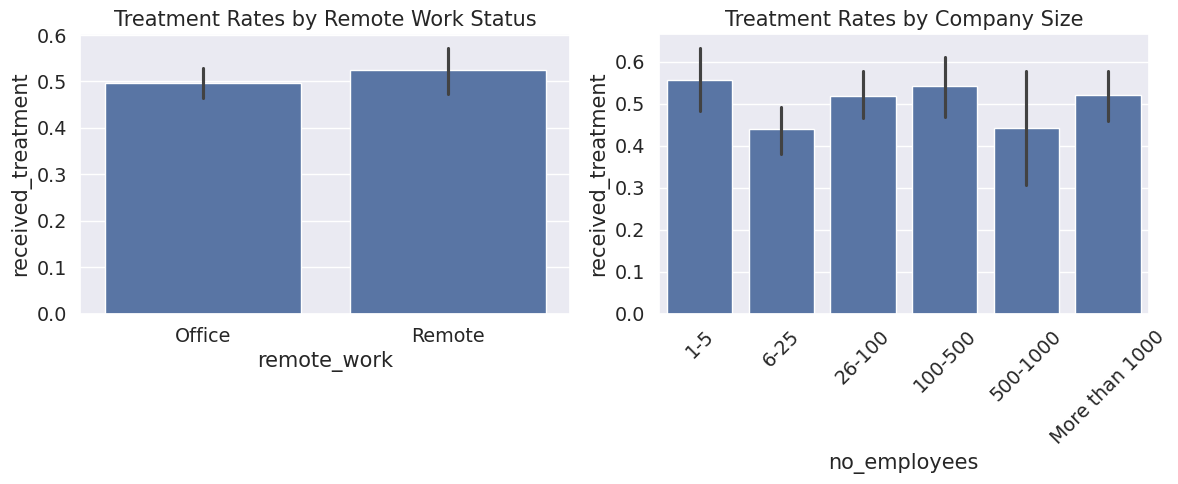

In [39]:
# Remote work analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='remote_work', y='received_treatment', data=df)
plt.title('Treatment Rates by Remote Work Status')
plt.xticks([0, 1], ['Office', 'Remote'])

# Company size analysis
plt.subplot(1, 2, 2)
company_size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
sns.barplot(x='no_employees', y='received_treatment', data=df, order=company_size_order)
plt.title('Treatment Rates by Company Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Questions 2*** Policy and Practice Interventions

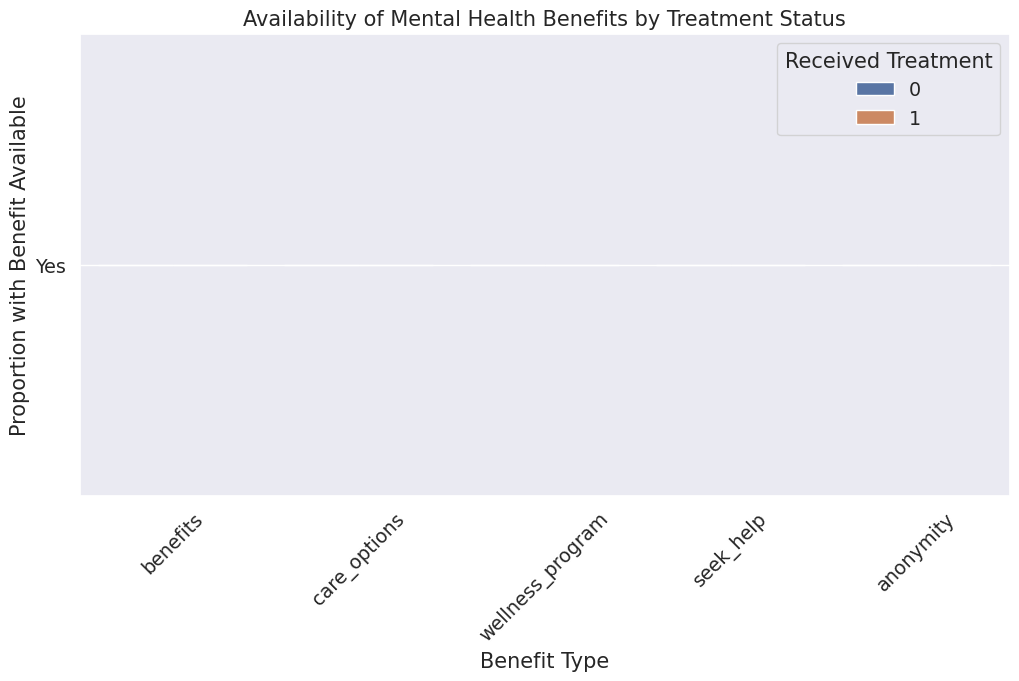

In [40]:
# Workplace benefits analysis
benefit_cols = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity']
benefit_data = df[benefit_cols + ['received_treatment']].melt(id_vars='received_treatment')

plt.figure(figsize=(12, 6))
sns.barplot(x='variable', y='value', hue='received_treatment',
            data=benefit_data, estimator=lambda x: sum(x=='Yes')/len(x))
plt.title('Availability of Mental Health Benefits by Treatment Status')
plt.ylabel('Proportion with Benefit Available')
plt.xlabel('Benefit Type')
plt.xticks(rotation=45)
plt.legend(title='Received Treatment')
plt.show()

***Question 3*** Diverse Worker Populations

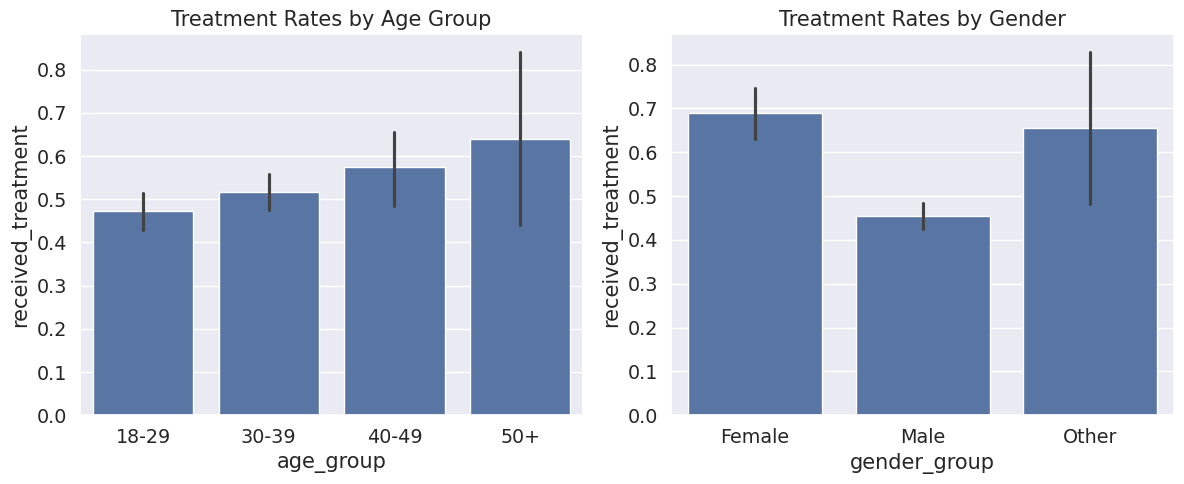

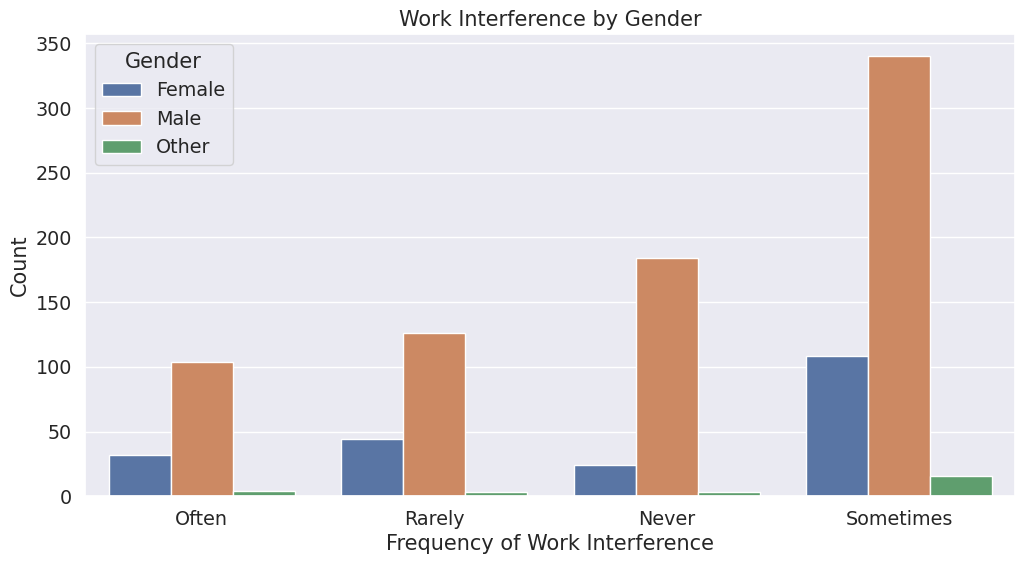

In [41]:
# Age and gender analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='age_group', y='received_treatment', data=df)
plt.title('Treatment Rates by Age Group')

plt.subplot(1, 2, 2)
sns.barplot(x='gender_group', y='received_treatment', data=df)
plt.title('Treatment Rates by Gender')
plt.tight_layout()
plt.show()

# Work interference by demographics
plt.figure(figsize=(12, 6))
sns.countplot(x='work_interfere', hue='gender_group', data=df)
plt.title('Work Interference by Gender')
plt.xlabel('Frequency of Work Interference')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

#### Age Distribution
  Employment Patterns and Labor Force Dynamics

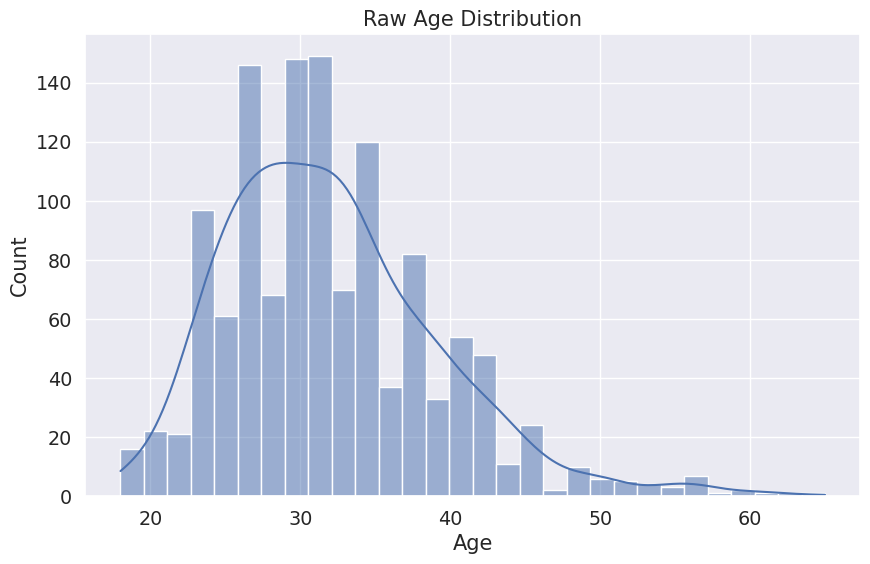

In [42]:
plt.figure(figsize=(10, 6))
# Convert Age to numeric, coercing errors to NaN for visualization
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Raw Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Check for anomalies

In [43]:
print("\nAge Anomalies:")
print("Negative Ages:", df[df['Age'] < 0]['Age'].count())
print("Ages > 100:", df[df['Age'] > 100]['Age'].count())


Age Anomalies:
Negative Ages: 0
Ages > 100: 0


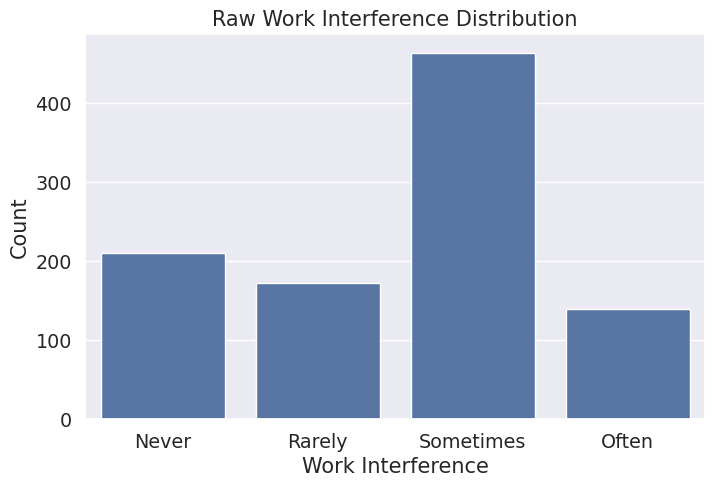

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(x='work_interfere', data=df, order=['Never', 'Rarely', 'Sometimes', 'Often'])
plt.title('Raw Work Interference Distribution')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

#### Country Distribution

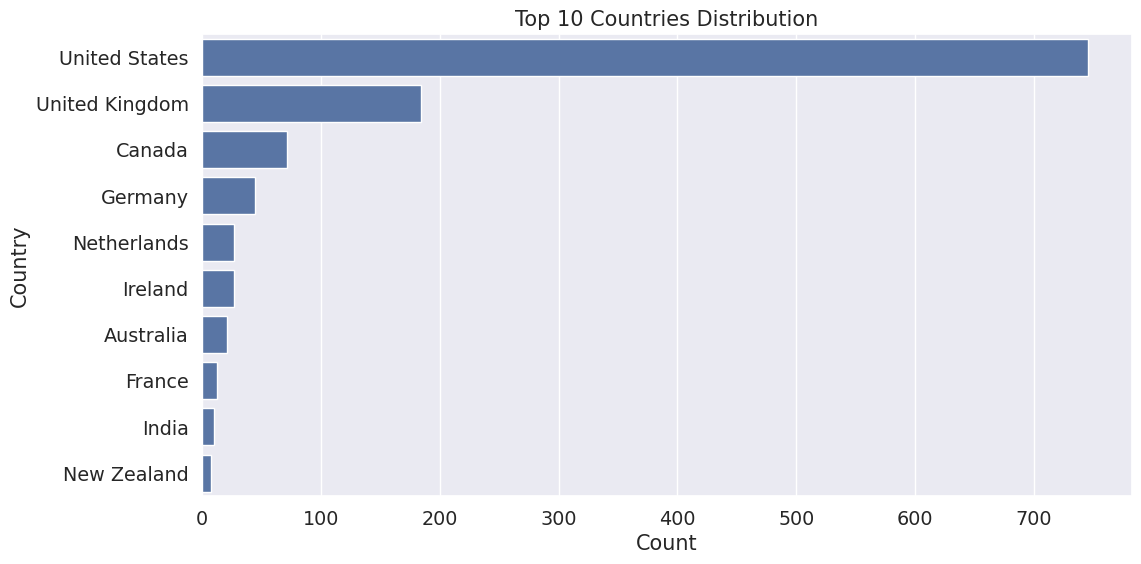

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10])
plt.title('Top 10 Countries Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

#### Treatment vs. Family History

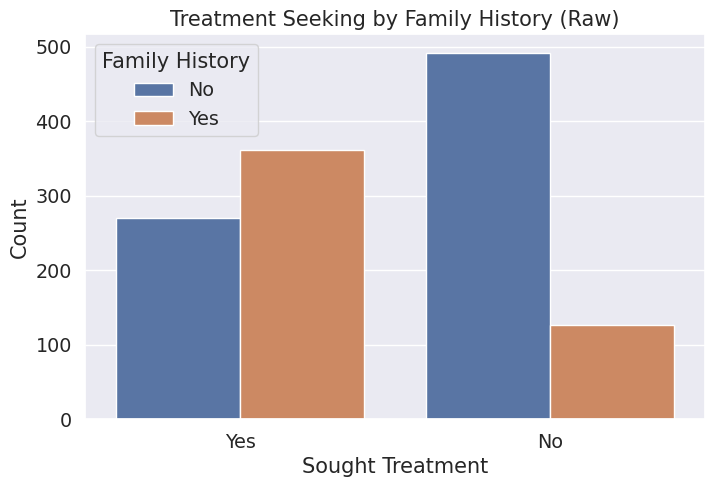

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', hue='family_history', data=df)
plt.title('Treatment Seeking by Family History (Raw)')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.legend(title='Family History')
plt.show()

#### Work Interference vs. Mental Health Consequence

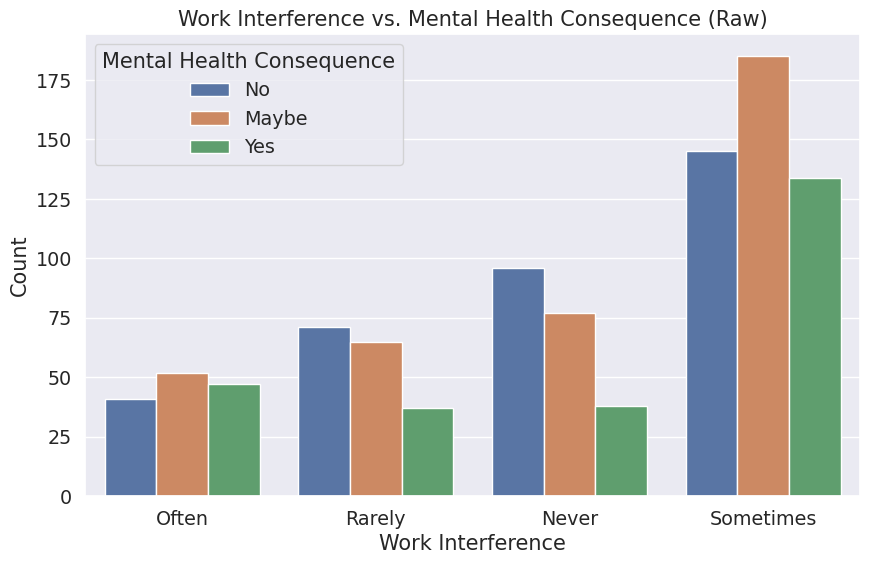

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='work_interfere', hue='mental_health_consequence', data=df)
plt.title('Work Interference vs. Mental Health Consequence (Raw)')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.legend(title='Mental Health Consequence')
plt.show()